<a href="https://colab.research.google.com/github/pra-sri/The-Spark-Foundation/blob/main/Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author : Prakhar Srivastava**


> Copyright: https://www.linkedin.com/in/prakharsri/ , Oct'2020



***Task 1 :***


```
In this every first task, we are going to predict the percentage scored by a student in his/her examination based upon his/her study hours. 
```


> Does number of study hours and the score are related to each other? If yes, then how are these related? 







#**Step 1: Data Acquisition**

Let's collect the data we are going to need.

In [1]:
# here we are importing the libraries that we are going to use in this project.

import pandas as pd                         #Pandas library : used for reading and manipulating large dataset.
import numpy as nm                          #Numpy library : used for storing and manipulating Multi-Dimensional Data.
import matplotlib.pyplot as plt             #Matplotlib library : used for ploting graphs.
%matplotlib inline

In [2]:
#Reading the data 

data=pd.read_csv("http://bit.ly/w-data") #our data will be loaded and stored in the variable

#peek-a-bow at the dta
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30




> Now, we will look at our data



In [3]:
data.shape #it tells the shape of our data i.e. number of rows and column 
#it will help us know how much data we are going to work at 

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**By the above statement we now know that our data doesn't contain any null value.**

#**Step 2 : Data Visualization**

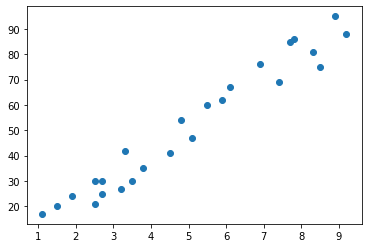

In [7]:
plt.scatter(data['Hours'], data['Scores'])

**By the above scatter plot, it is clear that both the values in our data is linearly related.**

# **Step 3 : Declartion Of Dependent & Independent variable**



> Since we have only two attributes in our data, so here, i'm going to declare variables directly without splitting



In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Spliting the data into two parts, one for training the model and the other for testing the model

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

#Step 4 : Training the alogorithm 


By graph we already knew that the data is linearly related, so we will use **Linear Regression** for our prediction.


In [10]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Now we will plot the regression line**

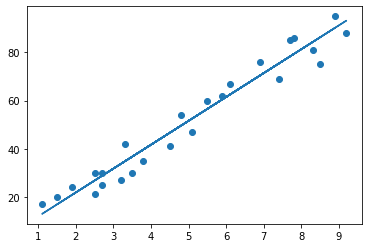

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#Step 5 : Testing the Model


> we are left with the last step, that is, testing our trained model which in our case is making the prediction.





In [12]:
y_pred  = regressor.predict(X_test)

> **Test Set Visualization**

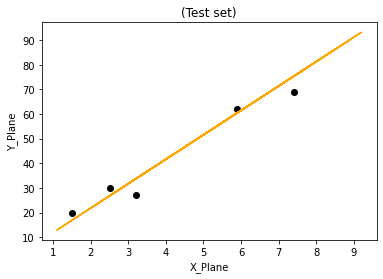

In [13]:
plt.scatter(X_test, y_test, color = 'Black')
plt.plot(X_train, regressor.predict(X_train), color = 'orange')
plt.title('(Test set)')
plt.xlabel('X_Plane')
plt.ylabel('Y_Plane')
plt.show()

**Lets compare our Predicted value with the given Actual Value.**

In [14]:
df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})  
df 

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


> **Now we can use our model for our own data.**

In [15]:
study_hour  = [[9.25]]
score_prediction  = regressor.predict(study_hour)

print("No of Hours of studying : ",study_hour)
print("Predicted Score : ",score_prediction)

No of Hours of studying :  [[9.25]]
Predicted Score :  [93.69173249]


**According to our model, if a student study 9.25hr/day then he/she can score 93.69%**

#Step 6 : Model Evaluation

> We have predicted the values also, now we must evaluate our model. How accurate it is?

> It can be determined by various type of error


In [16]:
#calculating r2score
from sklearn.metrics import r2_score
print("R2 Score : ",r2_score(y_test,y_pred))

R2 Score :  0.9454906892105354


In [17]:
#To find the error
from sklearn.metrics import mean_squared_error
print("Mean Square Error : ",mean_squared_error(y_test,y_pred))

Mean Square Error :  21.598769307217456


In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
